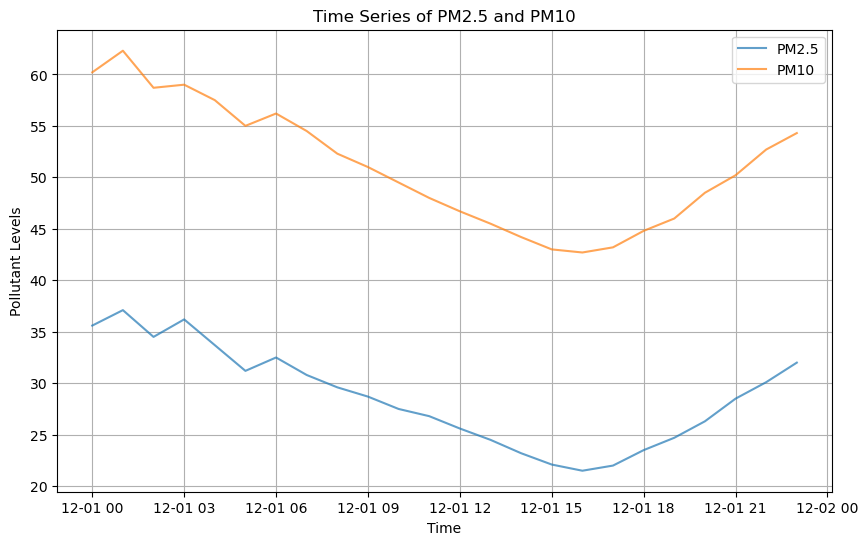

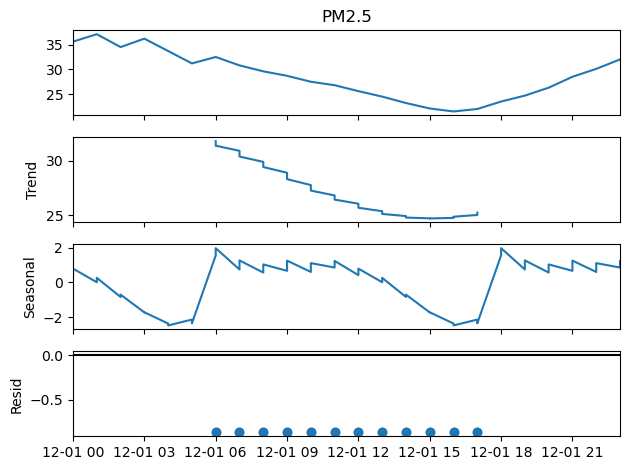

In [8]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from statsmodels.tsa.seasonal import seasonal_decompose 

# Corrected Data Dictionary
data = { 
    "date": ["2024-12-01"] * 24, 
    "time": [f"{i:02d}:00" for i in range(24)], 
    "location": ["CityA"] * 24, 
    "PM2.5": [35.6, 37.1, 34.5, 36.2, 33.7, 31.2, 32.5, 30.8, 29.6, 28.7, 27.5, 26.8, 25.6, 24.5, 23.2, 
              22.1, 21.5, 22.0, 23.5, 24.7, 26.3, 28.5, 30.1, 32.0], 
    "PM10": [60.2, 62.3, 58.7, 59.0, 57.5, 55.0, 56.2, 54.5, 52.3, 51.0, 49.5, 48.0, 46.7, 45.5, 44.2, 
             43.0, 42.7, 43.2, 44.8, 46.0, 48.5, 50.2, 52.7, 54.3], 
    "temperature": [22.5, 22.1, 21.9, 21.5, 21.2, 21.0, 21.1, 21.0, 22.0, 23.0, 24.2, 25.1, 26.0, 27.0, 
                    28.0, 28.5, 27.5, 26.5, 25.2, 24.0, 23.0, 22.5, 22.1, 22.0], 
    "wind_speed": [3.2, 3.0, 3.1, 3.3, 3.4, 3.5, 3.2, 3.1, 3.0, 2.9, 3.1, 3.2, 3.4, 3.5, 3.6, 3.8, 3.7, 
                   3.5, 3.3, 3.2, 3.0, 2.8, 2.7, 2.5]
} 

# Create DataFrame
df = pd.DataFrame(data) 

# Convert date and time columns into a single datetime column 
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time']) 
df.set_index('datetime', inplace=True) 

# Expand the dataset to simulate two full cycles 
df_extended = pd.concat([df, df.copy()], ignore_index=False) 
df_extended.sort_index(inplace=True)

# Handle missing data (if any) 
df_extended.fillna(df_extended.select_dtypes(include=np.number).mean(), inplace=True)

# Plot time-series data 
plt.figure(figsize=(10, 6)) 
plt.plot(df_extended.index, df_extended['PM2.5'], label='PM2.5', alpha=0.7) 
plt.plot(df_extended.index, df_extended['PM10'], label='PM10', alpha=0.7) 
plt.title('Time Series of PM2.5 and PM10') 
plt.xlabel('Time') 
plt.ylabel('Pollutant Levels') 
plt.legend() 
plt.grid(True)
plt.show() 

# Decompose time series for seasonality analysis 
result = seasonal_decompose(df_extended['PM2.5'], model='additive', period=24)  # Period is 24 hours 
result.plot() 
plt.show() 
